In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from Dataset import Dataset
from torch.utils.data import DataLoader
torch.set_default_dtype(torch.float64)

In [2]:
x_data = np.float64(np.linspace(-15, 15, 500))
y_data = np.float64(np.sin(x_data) / x_data)

In [3]:
dataset = Dataset(x_data, y_data)
trainset, testset = torch.utils.data.random_split(dataset, [0.9, 0.1], generator=torch.Generator().manual_seed(42))

activation = nn.Sigmoid()

In [4]:
class KELM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size, bias=False)

    def forward(self, x):
        x = self.fc1(x)
        x = activation(x)
        x = self.fc2(x)
        return x

model = KELM(1, 50, 1)

In [5]:
H = activation(model.fc1.bias.data.reshape(-1, 1) + model.fc1.weight.data @ trainset[:][0].reshape(1, -1)).T
T = trainset[:][1].reshape(1, -1).T

In [6]:
def f(x, gamma=0.1):
    return torch.exp(-gamma*torch.pow(torch.tensor(x).reshape(-1, 1).float()-trainset[:][0].reshape(1, -1), 2)) @ torch.linalg.inv(H @ H.T) @ T

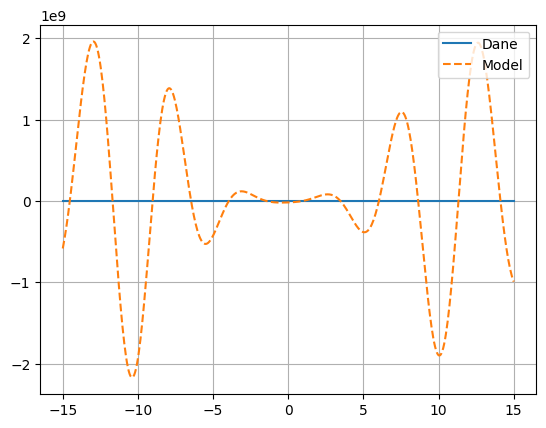

In [7]:
plt.plot(x_data, y_data)
plt.plot(x_data, f(x_data), '--')
plt.legend(['Dane', 'Model'], loc='upper right')
plt.grid()
plt.show()